# UAS PENGCID

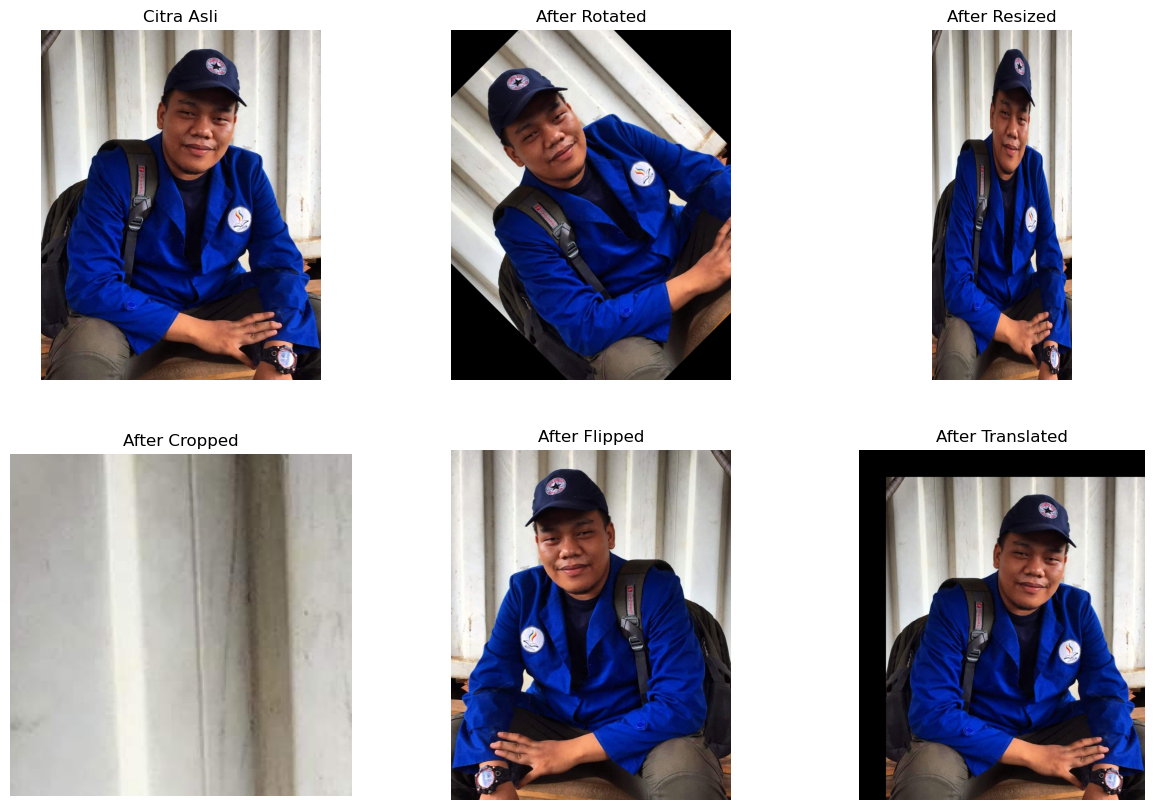

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv.imread('Foto Diri.jpg')

# Memeriksa apakah gambar berhasil dimuat
if img is None:
    raise FileNotFoundError('Gambar tidak ditemukan. Pastikan path gambar benar.')

# Mendapatkan ukuran gambar
rows, cols = img.shape[:2]

# Gambar asli
img_asli = img.copy()

# Resize (memperkecil lebar menjadi setengah)
height, width = img.shape[:2]
resized = cv.resize(img, (width // 2, height), interpolation=cv.INTER_CUBIC)

# Translasi (menggeser gambar 100 piksel ke kanan dan 100 piksel ke bawah)
M_translate = np.float32([[1, 0, 100], [0, 1, 100]])
translated = cv.warpAffine(img, M_translate, (cols + 100, rows + 100))

# Rotate (memutar gambar)
(tinggi, lebar) = img.shape[:2]
pusat = (lebar // 2, tinggi // 2)
M_rotate = cv.getRotationMatrix2D(pusat, 45, 1.0)
rotated = cv.warpAffine(img, M_rotate, (lebar, tinggi))

# Crop (memotong gambar)
cropped = img[50:300, 50:300]

# Flip (membalik gambar)
flipped = cv.flip(img, 1)

# Menampilkan semua gambar dalam layout 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Gambar asli
axs[0, 0].imshow(cv.cvtColor(img_asli, cv.COLOR_BGR2RGB))
axs[0, 0].set_title('Citra Asli')
axs[0, 0].axis('off')

# Gambar setelah diputar
axs[0, 1].imshow(cv.cvtColor(rotated, cv.COLOR_BGR2RGB))
axs[0, 1].set_title('After Rotated')
axs[0, 1].axis('off')

# Gambar setelah diubah ukuran
axs[0, 2].imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))
axs[0, 2].set_title('After Resized')
axs[0, 2].axis('off')

# Gambar setelah dipotong
axs[1, 0].imshow(cv.cvtColor(cropped, cv.COLOR_BGR2RGB))
axs[1, 0].set_title('After Cropped')
axs[1, 0].axis('off')

# Gambar setelah dibalik
axs[1, 1].imshow(cv.cvtColor(flipped, cv.COLOR_BGR2RGB))
axs[1, 1].set_title('After Flipped')
axs[1, 1].axis('off')

# Gambar setelah ditranslasi
axs[1, 2].imshow(cv.cvtColor(translated, cv.COLOR_BGR2RGB))
axs[1, 2].set_title('After Translated')
axs[1, 2].axis('off')

plt.show()